In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datetime import datetime
from matplotlib.ticker import FuncFormatter

numeric_dtypes = [
    np.int8, np.int16, np.int32, np.int64,
    np.uint8, np.uint16, np.uint32, np.uint64,
    np.float16, np.float32, np.float64,
    np.complex64, np.complex128
]

## Import csv data

In [2]:
df_credit_card = pd.read_csv("F:/Python/Project/1/Credit_card/og_data/credit_card_transactions.csv",parse_dates=['trans_date_trans_time','dob'])

## Creating a Copy of the DataFrame

- To ensure that the original dataset (`df_credit_card`) remains unaffected while performing certain operations, we will create a copy of the DataFrame. This allows us to work with the copy independently without modifying the original data.

In [3]:
df = df_credit_card.copy()

## Dropping Unnecessary Column 'Unnamed: 0'

In [4]:
if 'Unnamed: 0' in df.columns : df.drop(columns='Unnamed: 0',inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


## Summary of Missing Data in Numeric Columns
- This code snippet iterates over all numeric columns in the DataFrame and prints the number of missing (NaN) values for each column. It is useful for identifying and analyzing missing data in numeric columns.

In [5]:
for i in df.select_dtypes(include=numeric_dtypes):
    print(i," ",df[i].isna().sum())

cc_num   0
amt   0
zip   0
lat   0
long   0
city_pop   0
unix_time   0
merch_lat   0
merch_long   0
is_fraud   0
merch_zipcode   195973


## Verification of Row Count After Identifying Missing Data
- This code checks if the sum of missing and non-missing values in the merch_zipcode column equals the total number of rows in the DataFrame, ensuring that the identification of missing data is accurate.

In [6]:
df['merch_zipcode'].count() + df['merch_zipcode'].isna().sum()

1296675

In [7]:
df.shape

(1296675, 23)

## Update Gender Labels
- Map gender values from 'M' to 'Male' and 'F' to 'Female'.

In [8]:
df.loc[df['gender'] == 'M', 'gender'] = 'Male'
df.loc[df['gender'] == 'F', 'gender'] = 'Female'

## Capitalizing and replacing underscores from category column

In [9]:
# Define a function to capitalize and replace underscores
def format_value(value):
    # Replace underscores with spaces
    value = value.replace('_', ' ')
    # Capitalize each word
    return value.title()
    
df['category']=df['category'].apply(format_value)
df['category']

0               Misc Net
1            Grocery Pos
2          Entertainment
3          Gas Transport
4               Misc Pos
               ...      
1296670    Entertainment
1296671      Food Dining
1296672      Food Dining
1296673      Food Dining
1296674      Food Dining
Name: category, Length: 1296675, dtype: object

## Extracting exact age from DOB

In [10]:
# Get today's date
today = datetime.today()

# Calculate the age based on the year difference
df['age'] = today.year - df['dob'].dt.year

# Perform element-wise comparison to adjust for birthdays not yet occurred this year
df['age'] -= ((df['dob'].dt.month > today.month) |
              ((df['dob'].dt.month == today.month) & (df['dob'].dt.day > today.day))).astype(int)


## Extract Year & Month from transaction date

In [11]:
df['transac_year'] = df['trans_date_trans_time'].dt.year
df['transac_month'] = df['trans_date_trans_time'].dt.month

## Age wise buckets

In [12]:
# Define bins and labels
bins = [0, 17, 34, 54, float('inf')]
labels = ['<18', '18-34', '35-54', '55+']

# Create age buckets using pd.cut
df['age_buckets'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
age_c = df['age_buckets'].value_counts()
age_c.sort_index()

age_buckets
<18           0
18-34    246670
35-54    597965
55+      452040
Name: count, dtype: int64

In [13]:
bins = [17,27,43,59,78,float('inf')]
labels = ["Gen Z: ages 18–27","Millennials: ages 28–43","Gen X: ages 44–59","Boomers: ages 60–78","Silent Generation: ages 79+"]

df['generation'] = pd.cut(df['age'],bins=bins,labels=labels,right=True)
age_d = df['generation'].value_counts()
age_d.sort_index()

generation
Gen Z: ages 18–27               92845
Millennials: ages 28–43        425599
Gen X: ages 44–59              422166
Boomers: ages 60–78            259306
Silent Generation: ages 79+     96759
Name: count, dtype: int64

## Distribution of Age Buckets in Top 5 Cities
- This code shows the distribution of age buckets in the top 5 most populous cities from the dataset.

In [14]:
top_5_cities = df['city'].value_counts().sort_values(ascending=False).head(5).index.to_list()
tp_5_cities_by_age = df[df['city'].isin(top_5_cities)]
tp_5_cities_by_age = tp_5_cities_by_age.pivot_table(index='city',columns='age_buckets',aggfunc='size',observed=False)
tp_5_cities_by_age

age_buckets,<18,18-34,35-54,55+
city,,,,
Birmingham,0,0,5617,0
Meridian,0,0,5060,0
Phoenix,0,2052,3023,0
San Antonio,0,2558,2565,7
Utica,0,0,3070,2035


In [15]:
# top_5_cities = df['city'].value_counts().sort_values(ascending=False).head(5).index.to_list()
tp_5_cities_by_age = df[df['city'].isin(top_5_cities)]
tp_5_cities_d = tp_5_cities_by_age.pivot_table(index='city',columns='generation',aggfunc='size',observed=False)
tp_5_cities_d

generation,Gen Z: ages 18–27,Millennials: ages 28–43,Gen X: ages 44–59,Boomers: ages 60–78,Silent Generation: ages 79+
city,,,,,
Birmingham,0,3051,2566,0,0
Meridian,0,0,5060,0,0
Phoenix,2052,3023,0,0,0
San Antonio,0,2558,2565,7,0
Utica,0,1535,1535,2035,0


## Fraudulent Cases by Generation: What’s the Breakdown?

In [16]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [17]:
p = df.pivot_table(values='is_fraud',index='generation',aggfunc='sum',observed=False)
#p.loc['Total'] = p.sum()
p = p.sort_values(by='is_fraud',ascending=False)
p.reset_index(inplace=True)
p.columns = ['generation','is_fraud']
p

,generation,is_fraud
0,Gen X: ages 44–59,2172
1,Millennials: ages 28–43,2094
2,Boomers: ages 60–78,1828
3,Silent Generation: ages 79+,875
4,Gen Z: ages 18–27,537


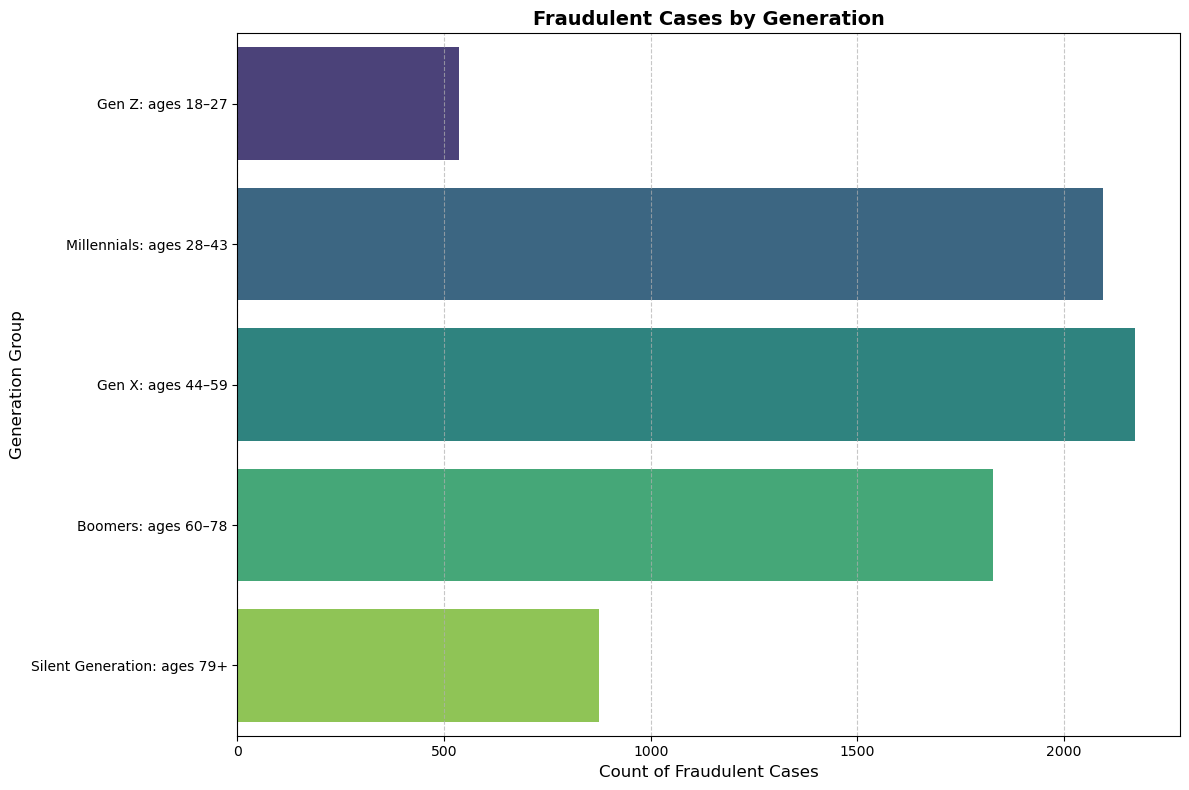

In [18]:
# Plotting
plt.figure(figsize=(12, 8))

# Create a barplot with seaborn
sns.barplot(data=p,x='is_fraud', y='generation', palette='viridis',hue='generation',legend=False)

# Customize plot
plt.xlabel('Count of Fraudulent Cases', fontsize=12)
plt.ylabel('Generation Group', fontsize=12)
plt.title('Fraudulent Cases by Generation', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

## Fraudulent Cases by Gender: What’s the Breakdown?

In [19]:
fraud_by_gender = df.pivot_table(values='is_fraud',index='gender',aggfunc='sum',observed=False)
fraud_by_gender.reset_index(inplace=True)
print(fraud_by_gender)

pop_by_gender = df.pivot_table(values='city_pop',index='gender',aggfunc='count',observed=False)
pop_by_gender.reset_index(inplace=True)
pop_by_gender

   gender  is_fraud
0  Female      3735
1    Male      3771


,gender,city_pop
0,Female,709863
1,Male,586812


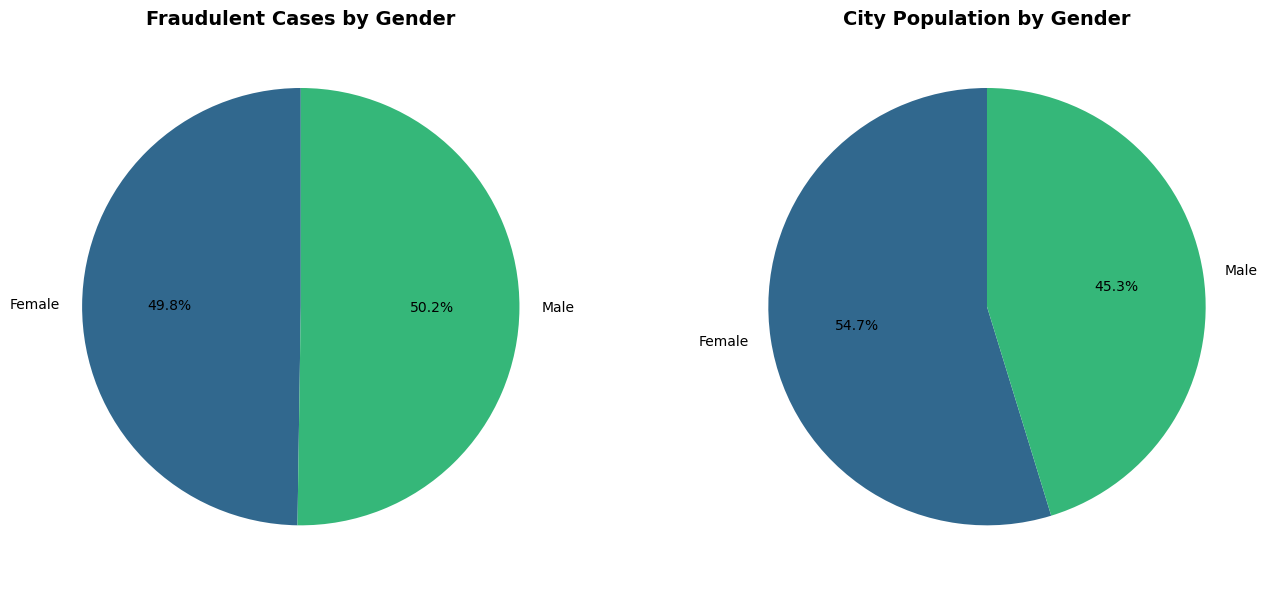

In [20]:

# Set up the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Pie chart for 'is_fraud'
colors = sns.color_palette('viridis', len(fraud_by_gender))
axs[0].pie(fraud_by_gender['is_fraud'], labels=fraud_by_gender['gender'], colors=colors, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Fraudulent Cases by Gender', fontsize=14, fontweight='bold')

# Pie chart for 'city_pop'
axs[1].pie(pop_by_gender['city_pop'], labels=pop_by_gender['gender'], colors=colors, autopct='%1.1f%%', startangle=90)
axs[1].set_title('City Population by Gender', fontsize=14, fontweight='bold')

# Customize layout
plt.tight_layout()
plt.show()

## Fraud Cases by Category: Which Categories Are Most Affected? 
- Visualizes the number of fraud cases by category using a bar plot. Categories are formatted with capitalized words and spaces instead of underscores.

In [21]:
category_values = df['category'].value_counts().sort_values(ascending=False).head(10).to_frame()
category_values.reset_index(inplace=True)
category_values

,category,count
0,Gas Transport,131659
1,Grocery Pos,123638
2,Home,123115
3,Shopping Pos,116672
4,Kids Pets,113035
5,Shopping Net,97543
6,Entertainment,94014
7,Food Dining,91461
8,Personal Care,90758
9,Health Fitness,85879


In [22]:
category_values_pivot = df.pivot_table(values='is_fraud',index='category',aggfunc='sum')
category_values_pivot.reset_index(inplace=True)
category_values_pivot = category_values_pivot.sort_values(by='is_fraud',ascending=False)
category_values_pivot.set_index('category',inplace=True)
category_values_pivot

,is_fraud
category,
Grocery Pos,1743
Shopping Net,1713
Misc Net,915
Shopping Pos,843
Gas Transport,618
Misc Pos,250
Kids Pets,239
Entertainment,233
Personal Care,220


C:\Users\bhara\AppData\Local\Temp\ipykernel_10832\2983398184.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability


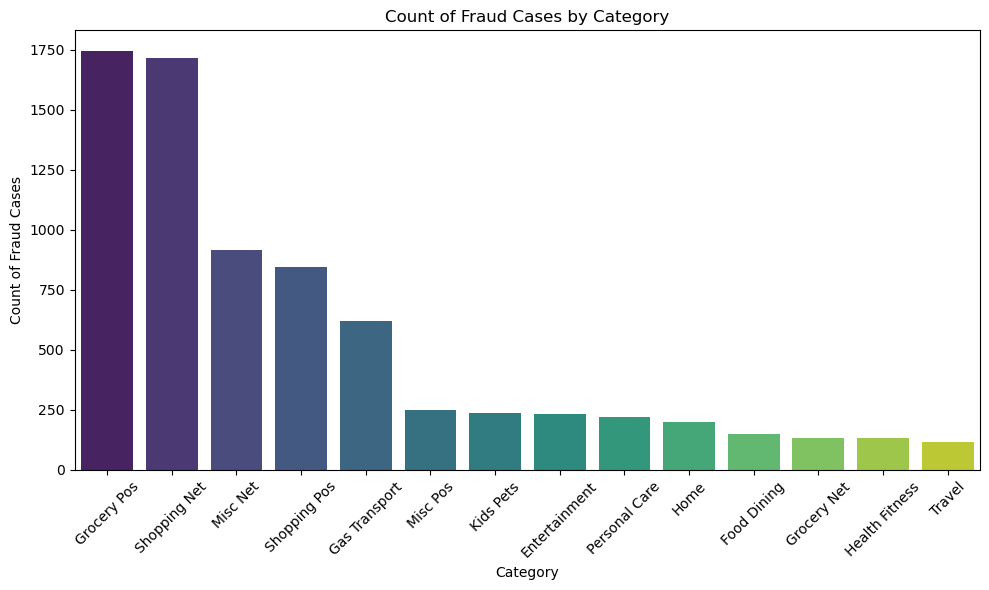

In [23]:
#bar plot with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_values_pivot.index, y=category_values_pivot['is_fraud'], palette='viridis',hue=category_values_pivot.index,legend=False)

# Customize the plot
ax.set_xlabel('Category')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

## Fraud Cases by Job: Which Professions Are Most Affected?

In [24]:

job_values_pivot = df.pivot_table(values='is_fraud',index='job',aggfunc='sum')
job_values_pivot.reset_index(inplace=True)
job_values_pivot = job_values_pivot.sort_values(by='is_fraud',ascending=False).head(10)
job_values_pivot['job'] = job_values_pivot['job'].apply(format_value)
job_values_pivot.set_index('job',inplace=True)
job_values_pivot

,is_fraud
job,
Materials Engineer,62
Trading Standards Officer,56
Naval Architect,53
Exhibition Designer,51
"Surveyor, Land/Geomatics",50
Mechanical Engineer,49
Prison Officer,48
Quantity Surveyor,48
Audiological Scientist,46


C:\Users\bhara\AppData\Local\Temp\ipykernel_10832\4053083475.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability


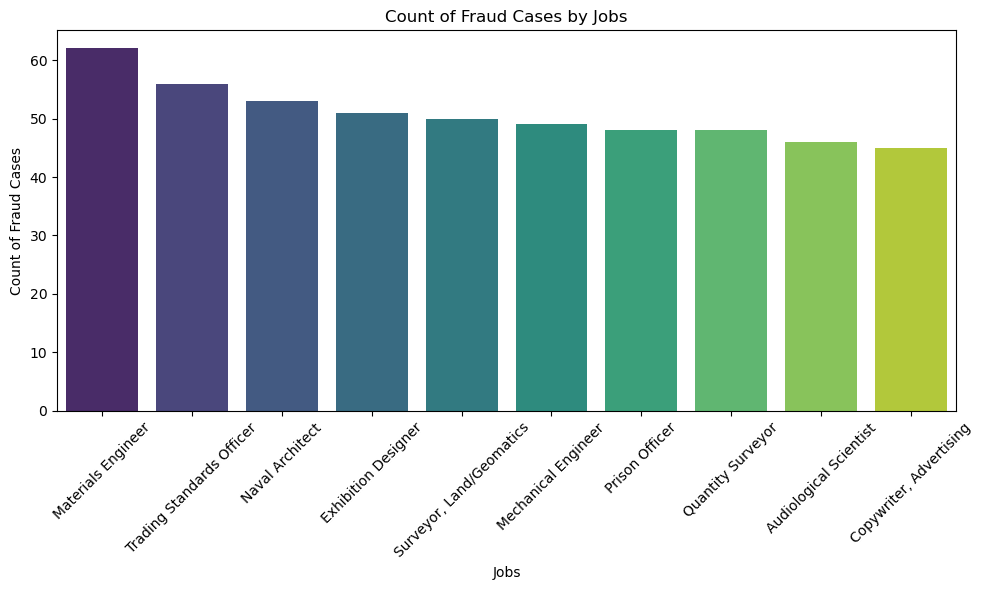

In [25]:
#bar plot with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=job_values_pivot.index, y=job_values_pivot['is_fraud'], palette='viridis',hue=job_values_pivot.index,legend=False)

# Customize the plot
ax.set_xlabel('Jobs')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Jobs')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,age,transac_year,transac_month,age_buckets,generation
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",Misc Net,4.97,Jennifer,Banks,Female,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,28705.0,36,2019,1,35-54,Millennials: ages 28–43
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",Grocery Pos,107.23,Stephanie,Gill,Female,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,NaN,46,2019,1,35-54,Gen X: ages 44–59
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,Entertainment,220.11,Edward,Sanchez,Male,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,83236.0,62,2019,1,55+,Boomers: ages 60–78
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",Gas Transport,45.00,Jeremy,White,Male,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,0,NaN,57,2019,1,55+,Gen X: ages 44–59
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,Misc Pos,41.96,Tyler,Garcia,Male,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,0,22844.0,38,2019,1,35-54,Millennials: ages 28–43


In [27]:

# Convert 'amount' to string with currency formatting
df['amount_formatted'] = df['amt'].apply(lambda x: f"${x:.2f}")

# Print the formatted DataFrame
#print("Formatted DataFrame:")
#print(df)

# Convert 'amount' back to numeric for analysis
df['amount_numeric'] = pd.to_numeric(df['amt'])

# Compute basic statistics
mean_amount = df['amount_numeric'].mean()
median_amount = df['amount_numeric'].median()
std_amount = df['amount_numeric'].std()

print("\nBasic Statistics:")
print(f"Mean amount: ${mean_amount:.2f}")
print(f"Median amount: ${median_amount:.2f}")
print(f"Standard deviation: ${std_amount:.2f}")



Basic Statistics:
Mean amount: $70.35
Median amount: $47.52
Standard deviation: $160.32


## Which Age Groups Spend the Most? A Transaction Analysis

In [28]:
age_by_transac = df.pivot_table(values='amount_numeric',index='generation',aggfunc='sum',observed=False)
#d.loc['Total'] = d.sum()
age_by_transac.sort_values(by='amount_numeric',inplace=True)
age_by_transac

,amount_numeric
generation,
Gen Z: ages 18–27,5648313.82
Silent Generation: ages 79+,6550200.46
Boomers: ages 60–78,17202077.16
Gen X: ages 44–59,30182359.99
Millennials: ages 28–43,31639477.47


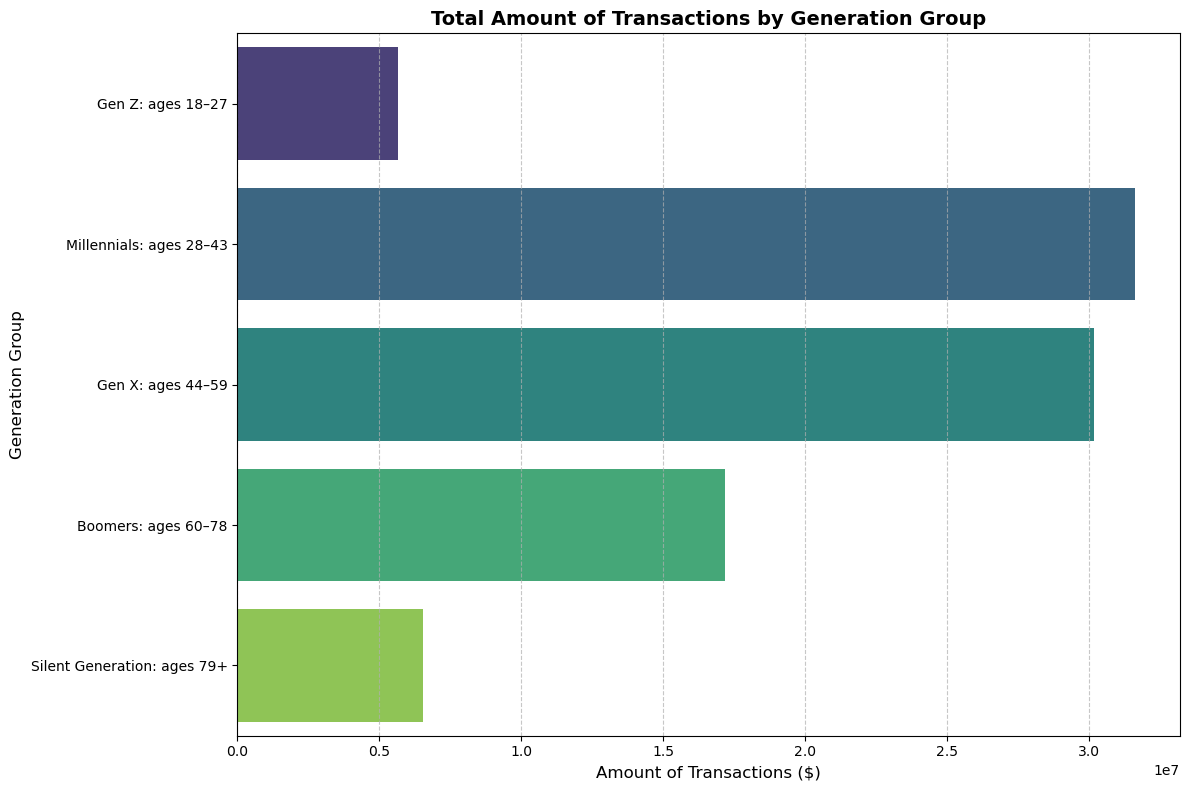

In [29]:
# Plotting
plt.figure(figsize=(12, 8))

# Create a barplot with seaborn
sns.barplot(data=age_by_transac, x='amount_numeric', y='generation', palette='viridis', hue='generation', legend=False)

# Customize plot
plt.xlabel('Amount of Transactions ($)', fontsize=12)
plt.ylabel('Generation Group', fontsize=12)
plt.title('Total Amount of Transactions by Generation Group', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [30]:
isfraud = df[df['is_fraud']==1]
age_by_fraud_transac = isfraud.pivot_table(values='amount_numeric',index='generation',aggfunc='sum',observed=False)
#age_by_fraud_transac.loc['Total'] = d.sum()
age_by_fraud_transac.sort_values(by='amount_numeric',inplace=True)
age_by_fraud_transac

,amount_numeric
generation,
Gen Z: ages 18–27,318436.25
Silent Generation: ages 79+,481928.83
Boomers: ages 60–78,1042860.90
Millennials: ages 28–43,1049651.79
Gen X: ages 44–59,1095210.84


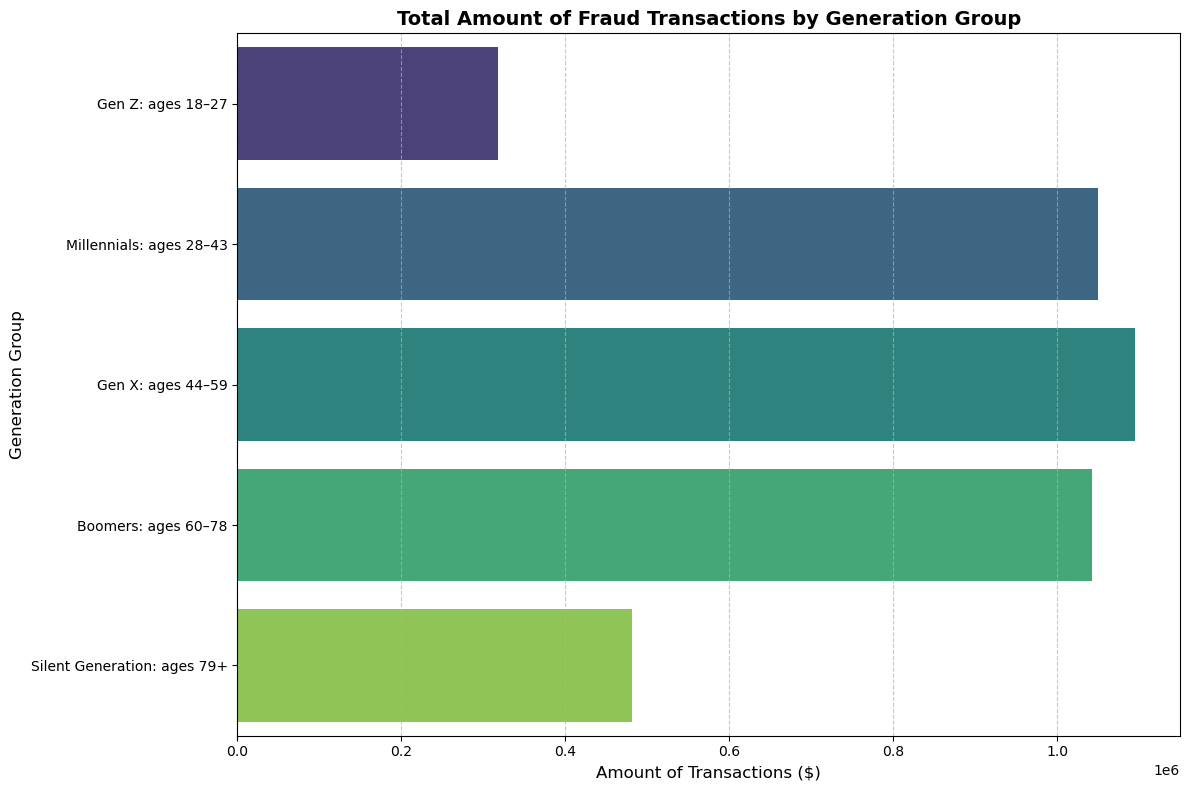

In [31]:
# Plotting
plt.figure(figsize=(12, 8))

# Create a barplot with seaborn
sns.barplot(data=age_by_fraud_transac, x='amount_numeric', y='generation', palette='viridis', hue='generation', legend=False)

# Customize plot
plt.xlabel('Amount of Transactions ($)', fontsize=12)
plt.ylabel('Generation Group', fontsize=12)
plt.title('Total Amount of Fraud Transactions by Generation Group', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

## Monthly Overview of Fraudulent Transactions in 2019

In [32]:
df_latest_year = df[df['transac_year']==2019]
df_trend_pivot = df_latest_year.pivot_table(values='is_fraud',index='transac_month',aggfunc='sum')
df_trend_pivot

,is_fraud
transac_month,
1,506
2,517
3,494
4,376
5,408
6,354
7,331
8,382
9,418


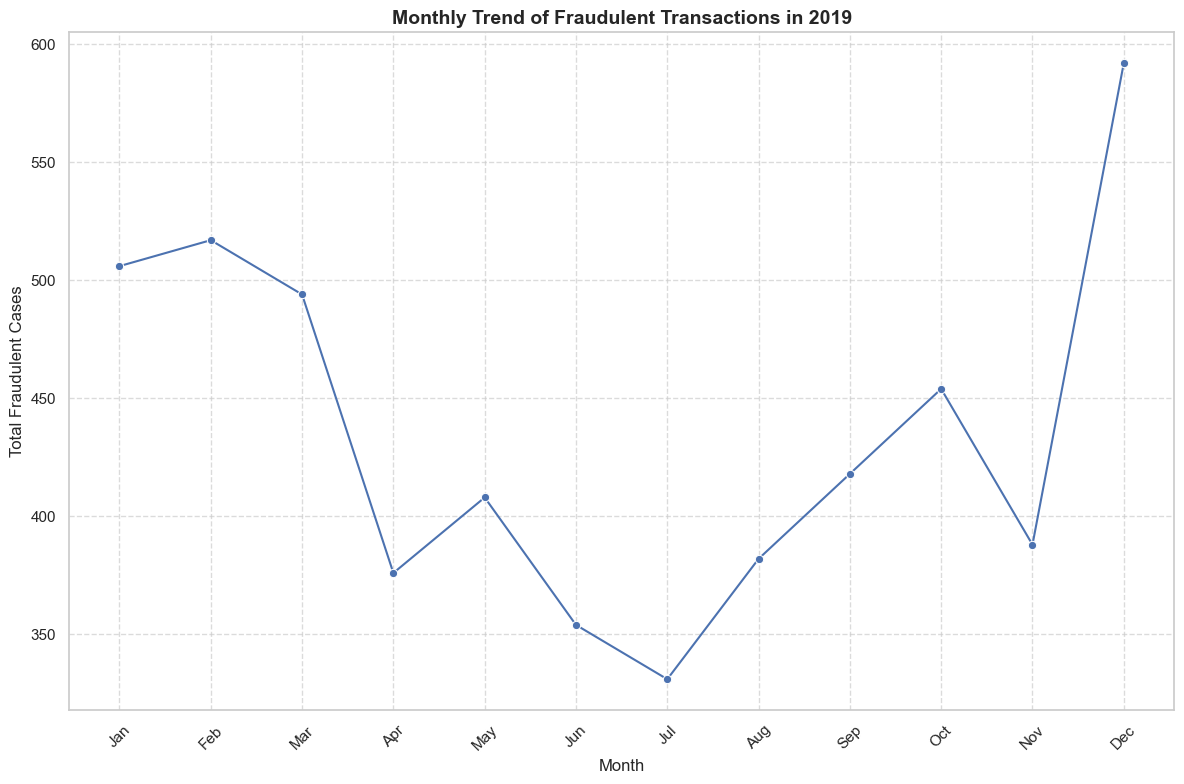

In [33]:
# Define a dictionary mapping month numbers to their names
month_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Filter data for the latest year
df_latest_year = df[df['transac_year'] == 2019]

# Pivot table to aggregate the sum of fraudulent cases per month
df_trend_pivot = df_latest_year.pivot_table(values='is_fraud', index='transac_month', aggfunc='sum')

# Map month numbers to month names for plotting
df_trend_pivot['transac_month_name'] = df_trend_pivot.index.map(month_dict)
df_trend_pivot = df_trend_pivot.reset_index(drop=True).set_index('transac_month_name')


# Set Seaborn style
sns.set(style="whitegrid")  # Apply white grid style for better readability

# Plotting
plt.figure(figsize=(12, 8))

# Create a line plot with seaborn
sns.lineplot(data=df_trend_pivot, x=df_trend_pivot.index, y='is_fraud', marker='o', color='b')

# Customize plot
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Fraudulent Cases', fontsize=12)
plt.title('Monthly Trend of Fraudulent Transactions in 2019', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()

## Quarterly Analysis of Top Transaction Categories

In [34]:
# Define a dictionary mapping months to quarters
month_to_quarter = {
    1: 'Q1', 2: 'Q1', 3: 'Q1',
    4: 'Q2', 5: 'Q2', 6: 'Q2',
    7: 'Q3', 8: 'Q3', 9: 'Q3',
    10: 'Q4', 11: 'Q4', 12: 'Q4'
}

df.head()
category_df = df.pivot_table(index='transac_month',columns='category',aggfunc='size')
category_ls=category_df.sum().sort_values(ascending=False).head(2).index.to_list()
category_df['Quarter'] = category_df.index.map(month_to_quarter)
category_ls.append('Quarter')
category_new=category_df[category_ls].reset_index(drop=True).set_index('Quarter')
category_new

category,Gas Transport,Grocery Pos
Quarter,,
Q1,10524,9854
Q1,9977,9413
Q1,14429,13821
Q2,13754,13069
Q2,14858,14051
Q2,14857,13885
Q3,8855,8270
Q3,8945,8186
Q3,7149,6524


<Axes: xlabel='Quarter'>

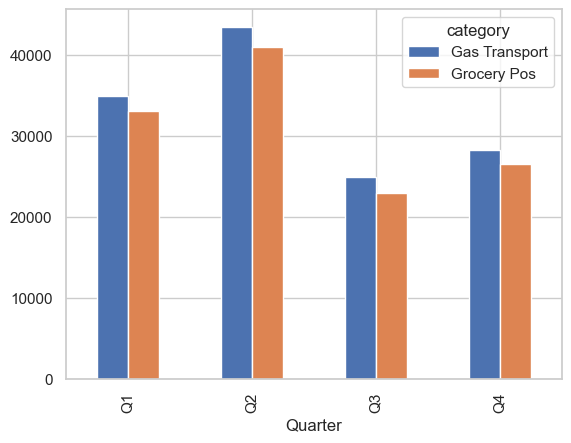

In [35]:
chart_category_df=category_new.copy()
chart_category_df = chart_category_df.groupby(by=category_new.index)[category_new.columns].sum()
chart_category_df.plot(kind='bar')